<a href="https://colab.research.google.com/github/RishavRajSharma/NNDL-Lab/blob/main/NNDL_Exp_1_(Double_Digit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
def create_two_digit_data(images, labels, n_samples=60000):
    X = []
    Y = []

    for _ in range(n_samples):
        i, j = np.random.randint(0, len(images), 2)

        img1, img2 = images[i], images[j]
        label1, label2 = labels[i], labels[j]

        combined_img = np.concatenate((img1, img2), axis=1)
        X.append(combined_img)
        Y.append([label1, label2])

    return np.array(X), np.array(Y)

X_train_2d, Y_train_2d = create_two_digit_data(x_train, y_train, 20000)
X_test_2d, Y_test_2d = create_two_digit_data(x_test, y_test, 5000)

X_train_2d = np.expand_dims(X_train_2d, -1)
X_test_2d = np.expand_dims(X_test_2d, -1)


In [4]:
Y_train_mask = (X_train_2d > 0.1).astype(np.float32)
Y_test_mask = (X_test_2d > 0.1).astype(np.float32)


In [5]:
def segmentation_model():
    model = models.Sequential([
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,56,1)),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.UpSampling2D(),

        layers.Conv2D(1, 3, activation='sigmoid', padding='same')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

seg_model = segmentation_model()
seg_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 28, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 56, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
seg_model.fit(
    X_train_2d, Y_train_mask,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 59s 410ms/step - accuracy: 0.9398 - loss: 0.3157 - val_accuracy: 0.9861 - val_loss: 0.0377
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 61s 433ms/step - accuracy: 0.9873 - loss: 0.0342 - val_accuracy: 0.9895 - val_loss: 0.0272
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 54s 384ms/step - accuracy: 0.9900 - loss: 0.0258 - val_accuracy: 0.9910 - val_loss: 0.0229
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 386ms/step - accuracy: 0.9914 - loss: 0.0220 - val_accuracy: 0.9921 - val_loss: 0.0201
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 59s 417ms/step - accuracy: 0.9925 - loss: 0.0192 - val_accuracy: 0.9931 - val_loss: 0.0177


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


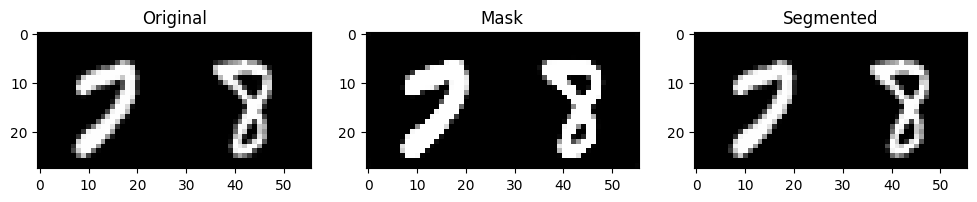

In [7]:
idx = 0
img = X_test_2d[idx:idx+1]
mask = seg_model.predict(img)

plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img[0].squeeze(), cmap="gray")

plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask[0].squeeze(), cmap="gray")

plt.subplot(1,3,3)
plt.title("Segmented")
plt.imshow((img * mask)[0].squeeze(), cmap="gray")

plt.show()


In [8]:
def split_digits(segmented_img):
    left = segmented_img[:, :, :28, :]
    right = segmented_img[:, :, 28:, :]
    return left, right


In [9]:
def classifier_model():
    model = models.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

clf_model = classifier_model()
clf_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
clf_model.fit(
    x_train[..., np.newaxis], y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.8412 - loss: 0.5074 - val_accuracy: 0.9797 - val_loss: 0.0661
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9805 - loss: 0.0642 - val_accuracy: 0.9843 - val_loss: 0.0561
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9871 - loss: 0.0429 - val_accuracy: 0.9880 - val_loss: 0.0409
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9894 - loss: 0.0336 - val_accuracy: 0.9897 - val_loss: 0.0392
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9918 - val_loss: 0.0363


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


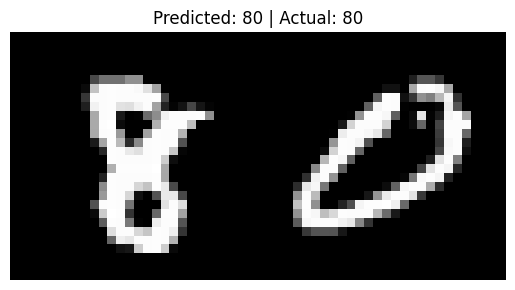

In [11]:
img = X_test_2d[10:11]
true_labels = Y_test_2d[10]

mask = seg_model.predict(img)
segmented = img * mask

left_digit, right_digit = split_digits(segmented)

pred1 = np.argmax(clf_model.predict(left_digit))
pred2 = np.argmax(clf_model.predict(right_digit))

plt.imshow(segmented[0].squeeze(), cmap="gray")
plt.title(f"Predicted: {pred1}{pred2} | Actual: {true_labels[0]}{true_labels[1]}")
plt.axis("off")
plt.show()
